In [1]:
!pip install ase dscribe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 21.6 MB/s eta 0:00:00


In [2]:
'''
#RUN LOCALLY
from dscribe.descriptors import MBTR, CoulombMatrix
from ase.io import read
from glob import glob
import numpy as np



# Setup
cm = CoulombMatrix(n_atoms_max=55,permutation='eigenspectrum')
mbtr = MBTR(
    species=["Cu"],
    geometry={"function": "inverse_distance"},
    grid={"min": 0, "max": 1, "n": 100, "sigma": 0.1},
    weighting={"function": "exp", "scale": 0.5, "threshold": 1e-3},
    periodic=False,
    normalization="l2")

list_atom=[]
list_atom2=[]

for file in glob("/content/drive/MyDrive/notebooks_solidification/Cu55-LM/*.xyz"):
  struct=read(file, format='xyz')
  struct.symbols=['Cu' for i in range(55)]
  list_atom2.append(mbtr.create(struct))
  list_atom.append(cm.create(struct))

np.save('cm.npy', list_atom)
np.save('mbtr.npy', list_atom2)
'''

'\n#RUN LOCALLY\nfrom dscribe.descriptors import MBTR, CoulombMatrix\nfrom ase.io import read\nfrom glob import glob\nimport numpy as np\n\n\n\n# Setup\ncm = CoulombMatrix(n_atoms_max=55,permutation=\'eigenspectrum\')\nmbtr = MBTR(\n    species=["Cu"],\n    geometry={"function": "inverse_distance"},\n    grid={"min": 0, "max": 1, "n": 100, "sigma": 0.1},\n    weighting={"function": "exp", "scale": 0.5, "threshold": 1e-3},\n    periodic=False,\n    normalization="l2")\n\nlist_atom=[]\nlist_atom2=[]\n\nfor file in glob("/content/drive/MyDrive/notebooks_solidification/Cu55-LM/*.xyz"):\n  struct=read(file, format=\'xyz\')\n  struct.symbols=[\'Cu\' for i in range(55)]\n  list_atom2.append(mbtr.create(struct))\n  list_atom.append(cm.create(struct))\n\nnp.save(\'cm.npy\', list_atom)\nnp.save(\'mbtr.npy\', list_atom2)\n'

explained variance ratio (first two components): [0.68284626 0.13259963]


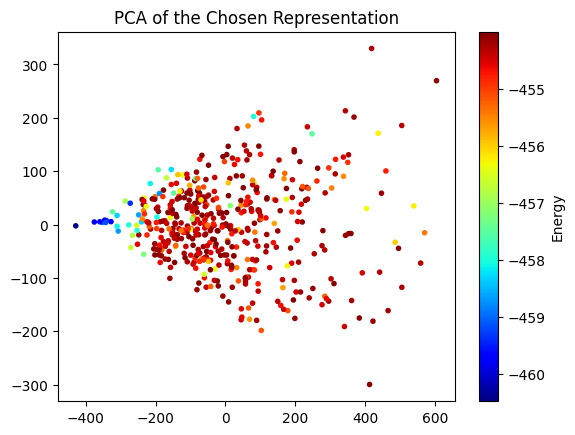

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

y = np.load('energies.npy')
#X = np.load('mbtr.npy')
X = np.load('cm.npy')
X=X[y<-454]
y=y[y<-454]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
dist=plt.scatter(X_r[:,0], X_r[:,1], marker='.', c=y, cmap='jet')
plt.title("PCA of the Chosen Representation")
cbar = plt.colorbar(dist)
cbar.set_label('Energy', rotation=90)
plt.show()


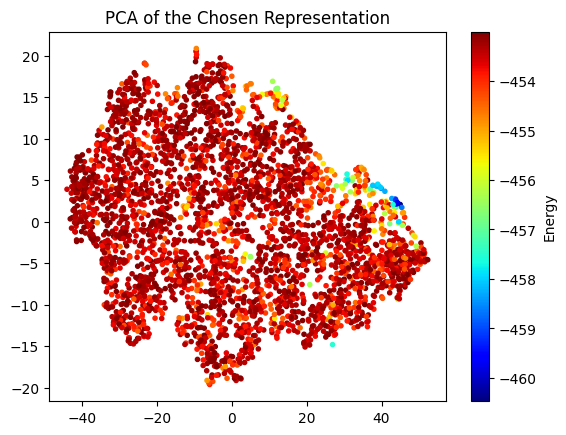

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE, locally_linear_embedding
import numpy as np

X = np.load('mbtr.npy')
#X = np.load('cm.npy')
y = np.load('energies.npy')
X=X[y<-453]
y=y[y<-453]

#X_r, _ = locally_linear_embedding(X,n_neighbors=50, n_components=2)
X_r = TSNE(n_components=2,perplexity=100,early_exaggeration=50).fit_transform(X)


plt.figure()
dist=plt.scatter(X_r[:,0], X_r[:,1], marker='.', c=y, cmap='jet')
plt.title("PCA of the Chosen Representation")
cbar = plt.colorbar(dist)
cbar.set_label('Energy', rotation=90)
plt.show()

-------------------------------------------------------------------------
# Clustering


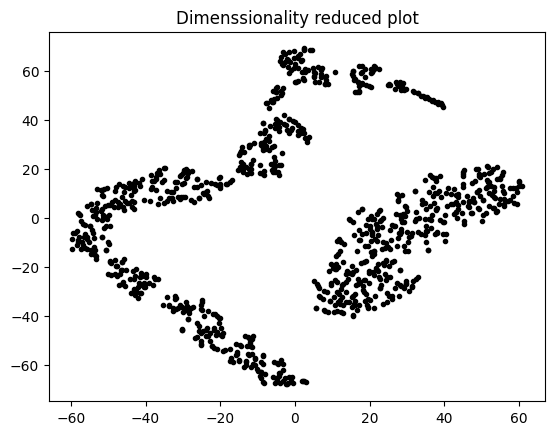

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE, locally_linear_embedding
from sklearn.decomposition import PCA
import numpy as np

X = np.load('/content/mbtr_copper.npy')

#pca = PCA(n_components=2)
#X_pca = pca.fit(X).transform(X)

#X_r, _ = locally_linear_embedding(X,n_neighbors=5, n_components=2)
X_r = TSNE(n_components=2,perplexity=10,early_exaggeration=50,metric="l1").fit_transform(X)

plt.figure()
dist=plt.scatter(X_r[:,0], X_r[:,1], marker='.', c='k')#y, cmap='jet')
plt.title("Dimenssionality reduced plot")
#cbar = plt.colorbar(dist)
#cbar.set_label('Energy', rotation=90)
plt.show()

<ipython-input-27-556e7613ee22>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('jet')


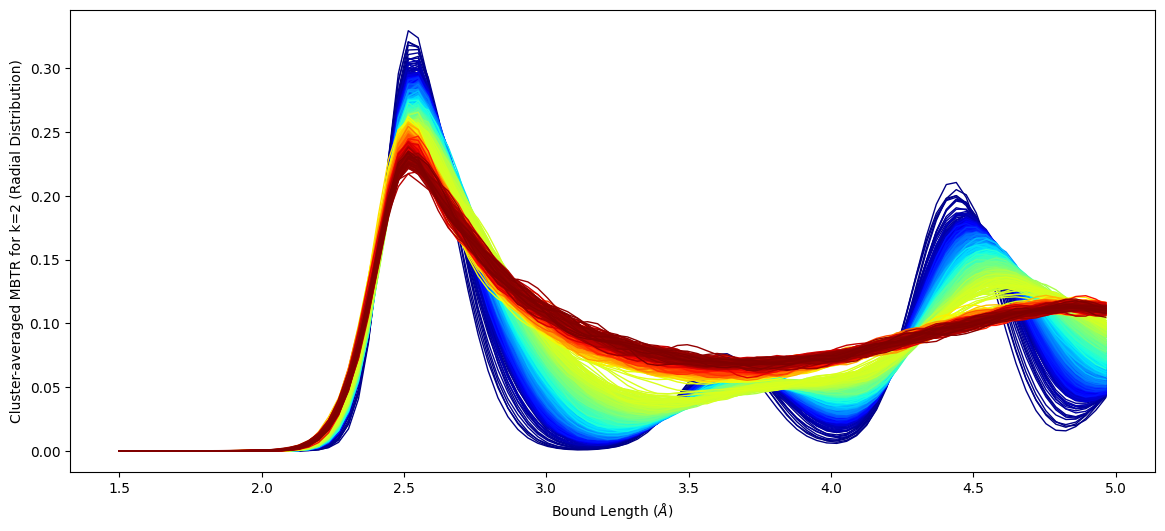

In [27]:

N=len(X)
cmap = matplotlib.cm.get_cmap('jet')
colours=[cmap(float(i)/float(N-1)) for i in range(N)]

xmin=1.5; xmax=5.0

plt.figure(figsize=(14, 6))
plt.xlabel("Bound Length ($\AA$)")
plt.ylabel("Cluster-averaged MBTR for k=2 (Radial Distribution)")
for i in range(1,len(X)):
  xx=X[i]
  N=len(xx)
  xx_plot=(np.array(range(N))/float(N))*(xmax-xmin)+xmin
  plt.plot(xx_plot, xx,'-', linewidth=1, c = colours[i])


plt.show()

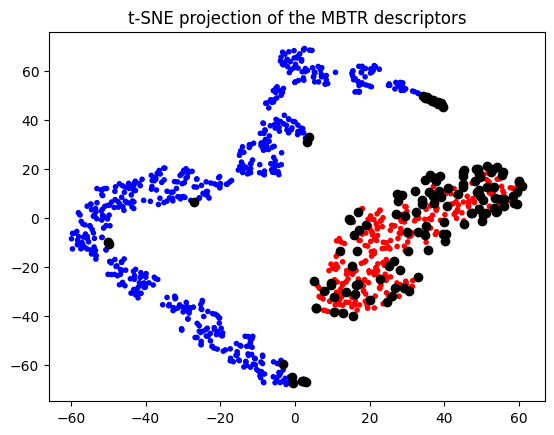

<ipython-input-16-cadd558ea1f3>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('bwr')


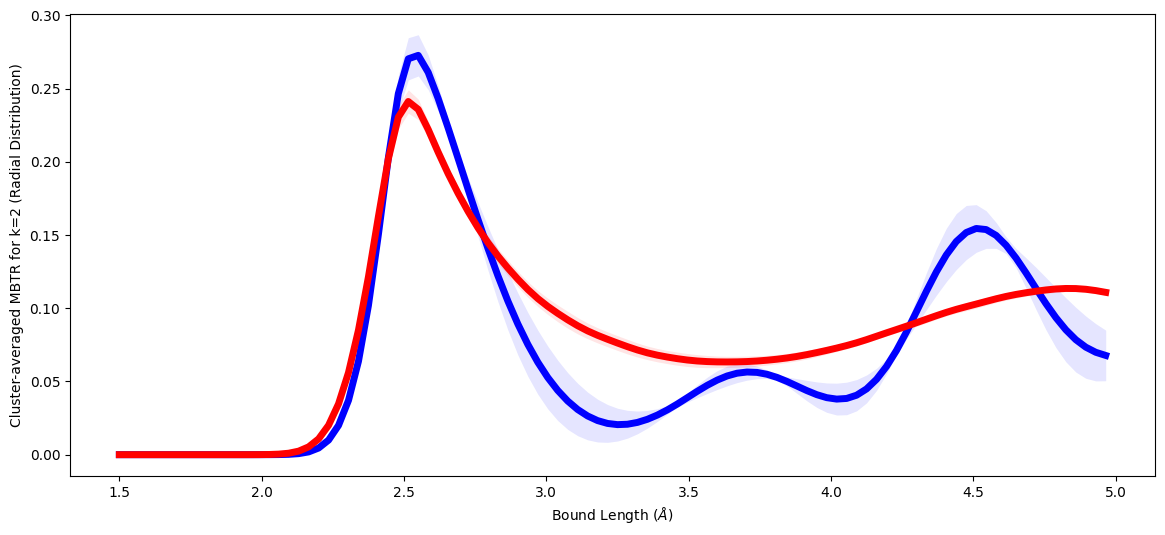

In [16]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib

#nb_c = 3
#model = KMeans(n_clusters=nb_c
#               , init='random'
#               , n_init=100
#               , max_iter=1000
#               , tol=1e-04
#              )
model = DBSCAN(eps=0.20,
               min_samples=10,
               metric='l1')

model.fit(X)

#y_pred = model.predict(X)
y_pred = model.labels_
nb_c=max(y_pred)+1

plt.figure()
plt.title("t-SNE projection of the MBTR descriptors")
plt.scatter(X_r[y_pred!=-1][:, 0], X_r[y_pred!=-1][:,1], marker='.', c = y_pred[y_pred!=-1], cmap='bwr')
plt.scatter(X_r[y_pred==-1][:, 0], X_r[y_pred==-1][:,1], marker='o', c = 'k')
plt.show()

cmap = matplotlib.cm.get_cmap('bwr')
colours=[cmap(float(i)/float(nb_c-1)) for i in range(nb_c)]

xmin=1.5; xmax=5.0

plt.figure(figsize=(14, 6))
plt.xlabel("Bound Length ($\AA$)")
plt.ylabel("Cluster-averaged MBTR for k=2 (Radial Distribution)")
for i in range(nb_c):
  aux=X[y_pred==i]
  xx=np.mean(np.array(aux), axis=0)
  N=len(xx)
  xx_plot=(np.array(range(N))/float(N))*(xmax-xmin)+xmin
  plt.plot(xx_plot, xx,'-', linewidth=5, c = colours[i])
  std=np.std(np.array(aux), axis=0)
  plt.fill_between(xx_plot, xx-std, xx+std, alpha=.1, linewidth=0, color = colours[i])
plt.show()


------------------------------------------------------------------------------
#MD